In [1]:
import numpy as np 
import pandas as pd 
from google.colab import drive
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from bokeh.io import output_notebook,show
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

In [3]:
os.chdir('/content/drive/MyDrive/ESAA-2')

In [4]:
data = pd.read_csv('insurance.csv')

In [5]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


* sex: 0 female / 1 male
* smoker: 1 yes / 0 no
* region: 0 northeast 북동 / 1 northwest 북서 / 2 southeast 남동 / 3 southwest 남서

# 환자들의 연령에 주목하여 자료를 분석하기.

● 데이터에서 특정 나이의 환자들만 살펴본다.

● 나이가 치료 비용에 어떤 영향을 미치는지 살펴본다.

## 1) 환자들의 연령 분포

● distplot: 히스토그램 + 밀도 그래프

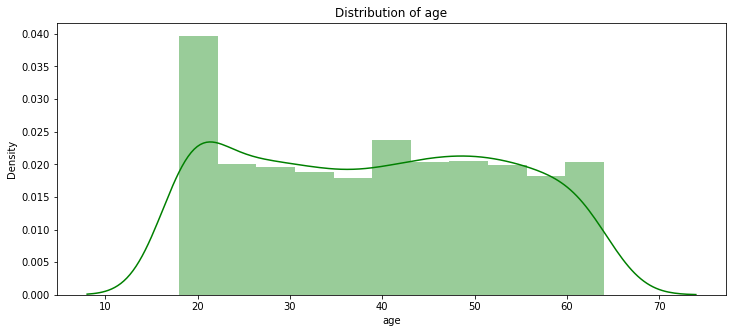

In [7]:
plt.figure(figsize=(12,5)) #그래프 사이즈 설정
plt.title("Distribution of age") #그래프 제목 설정
ax = sns.distplot(data["age"], color = 'g')

=> 환자들의 나이: 18 ~ 64 세

=> 18 ~ 22세인 환자들이 비교적 많은 편이며, 전반적으로 분포가 고르다.

## 2) 18세 환자 중 흡연자의 수

● catplot: 하나의 연속형 변수와 하나 이상의 범주형 변수의 관계 파악 가능

* x: x축에 해당하는 자료
* kind: 그릴 그래프의 종류. ex) count, bar, strip, swarm, box, violin, point 등
* palette: 범주형 변수의 여러 수준을 분류하기 위해 사용할 색상. sns.color_palette()를 사용해 팔레트를 설정할 수 있음.
* data: DataFrame 형태의 자료
* legend, row_order, col_order, seed 등

https://seaborn.pydata.org/generated/seaborn.catplot.html

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

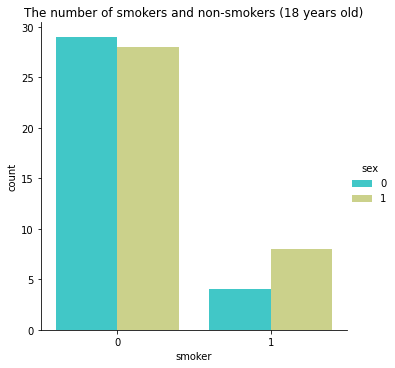

In [8]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)]) # 18세인 데이터만 추출
plt.title("The number of smokers and non-smokers (18 years old)")

=> 18세 환자 중에는 비흡연자가 더 많다. 

=> 흡연자의 수는 남성이 여성보다 많다.

## 3) 18세 환자의 치료 비용

● boxplot: 범주형 변수에 따른 연속형 변수의 분포 파악 가능.

- x, y: 처리할 변수.
- data: DataFrame, array, or list of arrays, optional 가능.
- orient: box 그래프의 방향 결정. h - horizontal / v - vertical 
- palette: 범주형 변수의 여러 수준을 구별하기 위한 색상

https://seaborn.pydata.org/generated/seaborn.boxplot.html

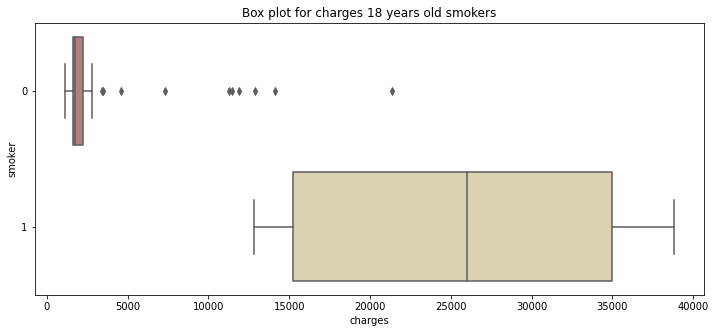

In [9]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

=> 18세의 경우, 흡연자가 비흡연자보다 치료에 훨씬 많은 돈을 쓴다.

=> 비흡연자의 box graph 를 참고하면, 꼬리를 확인할 수 있다. 이는 심각한 질병이나 사고가 원인이라고 추측할 수 있다.

## 4) 비흡연자의 나이에 따른 치료비

● jointplot: 두 변수 각각의 분포와 2차원 분포를 함께 파악 가능.

* kind: 그래프의 종류
 * basic: 개별 분포 - hist / 2차원 분포: scatter
 * reg: 개별 분포 - distplot(hist+density) / 2차원 분포: lmplot(scatter+lm)
 * hex: 개별 분포 - hist / 2차원 분포: hex
 * kde: 개별 분포 - density / 2차원 분포: kde (등고선)

* joint_kws: 딕셔너리로, 2차원 분포 그래프에 조건 추가.
 * fill = True 그래프 내부에 색을 칠함.
 * bins 등 그래프 관련 조건 추가 가능.
* marginal_kws: 딕셔너리로, 개별 분포 그래프에 조건 추가.
 * fill = True 그래프 내부에 색을 칠함.
 * bins 등 그래프 관련 조건 추가 가능.

https://seaborn.pydata.org/generated/seaborn.jointplot.html

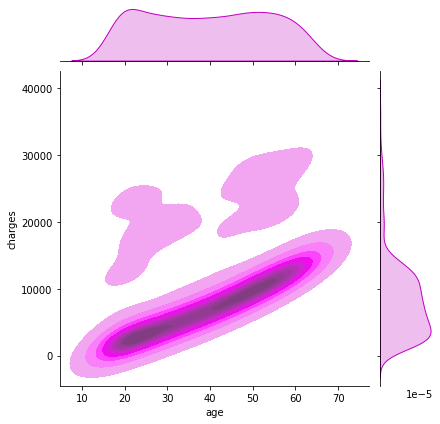

In [10]:
sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", 
                  color="m", marginal_kws=dict(fill=True), joint_kws=dict(fill=True))

● plot_join: jointplot의 메서드로, 2차원 분포 그래프에 이변량 그래프를 추가함.

- JointGrid.plot_joint(self, func, **kwargs)
- 그래프를 그릴 방식과 스타일을 입력하여 그래프를 추가.
- c: color / s: size / linewidth: 두께 / marker: 표시 모양 

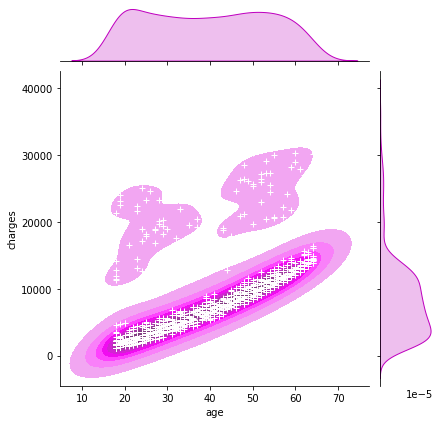

In [11]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", 
                  color="m", marginal_kws=dict(fill=True), joint_kws=dict(fill=True))
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")

● ax_joint: 등고선 형태 그래프의 모습을 사용자가 정의하고 수정. 

- g.ax_joint.collections[0].set_alpha(0) => 비교적 밀도가 높은 부분만 그리기.

● set_axis_labels: 각 축의 이름을 재설정


Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

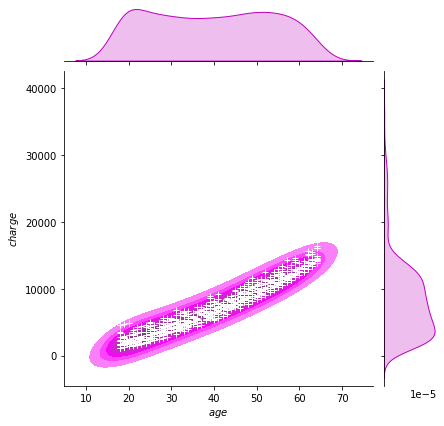

In [12]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", 
                  color="m", marginal_kws=dict(fill=True), joint_kws=dict(fill=True))
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$age$", "$charge$")
ax.set_title('Distribution of charges and age for non-smokers')

● bokeh.plotting : figure를 생성 후, 그래프를 추가.

* figure: 그래프를 그릴 공간 => plot_width/plot_height로 크기 조절.
* figure 내부에는 벡터화 방식으로 그래프를 그리는 여러 방식이 존재. circle, hex, line, square 

https://docs.bokeh.org/en/latest/docs/reference/plotting.html

In [13]:
#non - smokers
from bokeh.plotting import figure, show

p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 0)].age,y=data[(data.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

=> 나이가 증가할수록, 치료비도 증가한다.

## 5) 흡연자의 나이에 따른 치료비

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

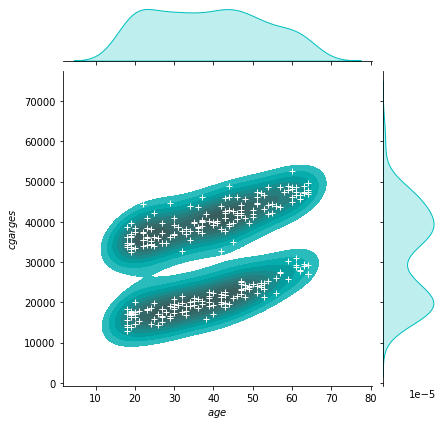

In [14]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", 
                  color="c",marginal_kws=dict(fill=True), joint_kws=dict(fill=True))
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$age$", "$cgarges$")
ax.set_title('Distribution of charges and age for smokers')

In [15]:
#smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

=> 자료가 2군데에 밀집되어 있다.

=> 각각 나이가 증가할수록 치료비가 증가하는 추세를 보인다.

## 6) 흡연 여부, 나이에 따른 치료비

● lmplot: scatter + lm 

Text(0.5, 1.0, 'Smokers and non-smokers')

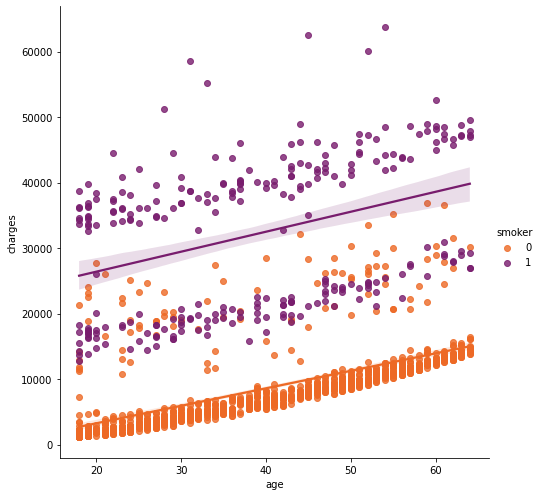

In [16]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

=> 흡연자의 비용이 비흡연자의 비용보다 많다.

=> 회귀 곡선을 참고하면, 나이가 증가할수록 치료비도 증가하는 추세이다.

=> 하지만, 산점도를 참고하면, 흡연자의 치료비와 나이는 큰 관계가 있다고 할 수 없다.

# 환자들의 BMI에 주목하여 자료를 분석하기.

● BMI가 치료비에 어떤 영향을 미치는지 살펴본다.

## 1) 환자들의 BMI 분포

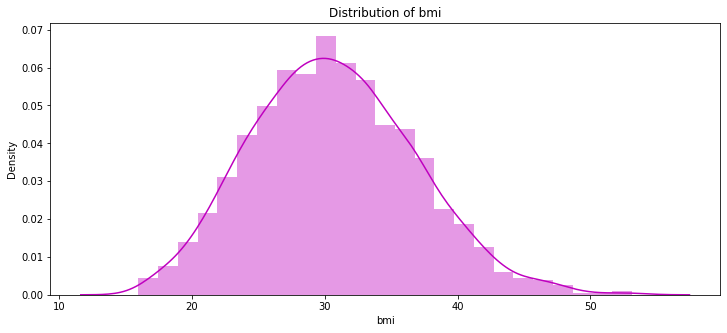

In [17]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

=> 분포가 정규분포와 유사하다.

=> 평균 BMI는 약 30이다. (WHO 기준 30.0은 비만이 시작되는 수치이다.)

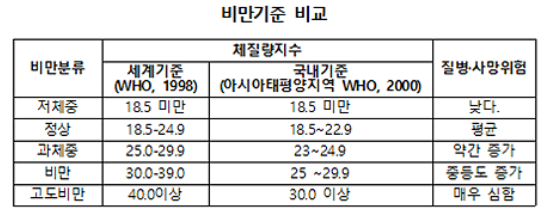

## 2) BMI 지수에 따른 치료비 분포

● BMI 지수가 30 이상인 환자들의 치료비 분포

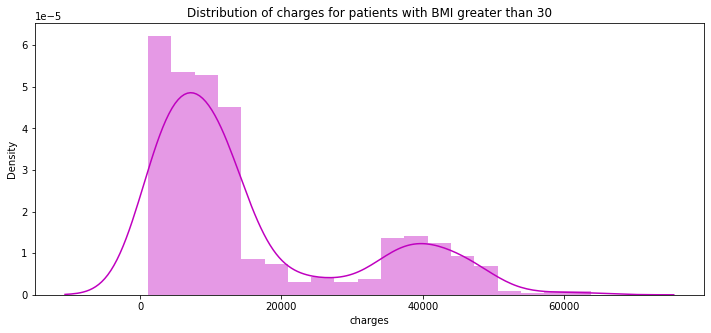

In [18]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

=> 비만인 환자들의 치료비는 0 ~ 60000 사이이다.

=> 0 ~ 20000 과 30000 ~ 50000에 밀집되어 있다.

● BMI 지수가 30 미만인 환자들의 치료비 분포

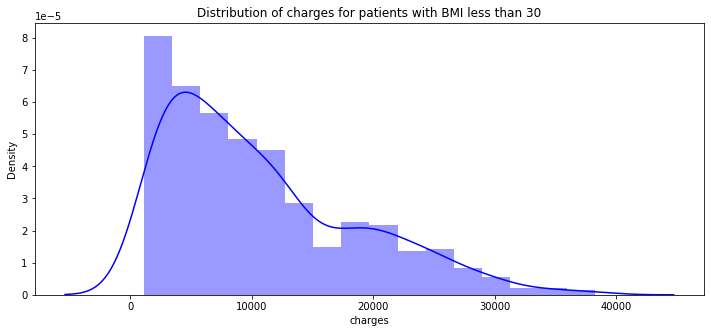

In [19]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

=> 비만이 아닌 환자들의 치료비는 0~40000 사이이다.

=> 왼쪽으로 치우쳐 있다.

●  BMI 지수에 따른 치료비 분포

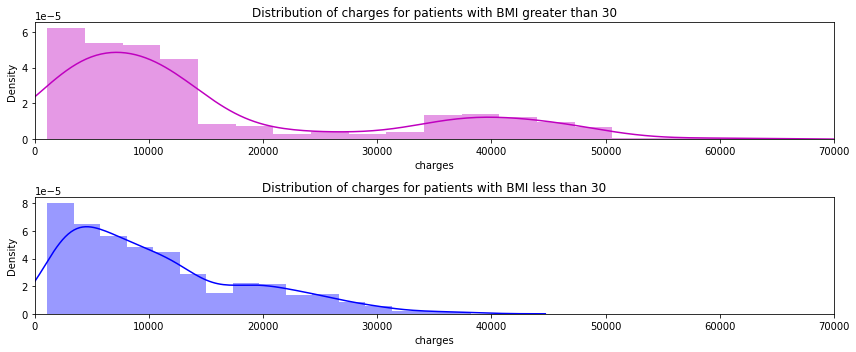

In [20]:
plt.figure(figsize=(12,5))

plt.subplot(2,1,1)
plt.title("Distribution of charges for patients with BMI greater than 30")
sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')
plt.xlim([0,70000])

plt.subplot(2,1,2)
plt.title("Distribution of charges for patients with BMI less than 30")
sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')
plt.xlim([0,70000])

plt.tight_layout()
plt.show()

=> 비만인 환자들의 치료비가 비교적 많다.